In [1]:
from edgedroid.models.timings import *
import edgedroid.data as default_data

exec_time_data, neuroticism_data, imp_data, dur_data = default_data.load_default_exec_time_data()
exec_time_data

,run_id,ttf,exec_time,neuroticism
0,134146,0.597441,3.654797,0.375
1,134146,0.553513,4.438645,0.375
2,134146,0.561716,2.943222,0.375
3,134146,0.586512,5.405761,0.375
4,134146,0.558940,5.225161,0.375
...,...,...,...,...
6755,137353,0.557074,6.439071,0.625
6756,137353,0.534339,4.680858,0.625
6757,137353,0.560288,3.467878,0.625
6758,137353,0.579000,2.325759,0.625


In [2]:
exec_time_data["run_id"].unique()

array([134146, 134470, 134584, 134614, 134623, 134671, 134710, 134716,
       134797, 135199, 135241, 135274, 135301, 135343, 135352, 135385,
       135391, 135670, 135715, 135769, 135955, 136060, 136123, 136144,
       136285, 136354, 136516, 136519, 136522, 136780, 136858, 136894,
       136906, 136930, 136981, 136984, 136987, 137299, 137344, 137353])

In [3]:
data = exec_time_data[exec_time_data["run_id"] == 136144][["exec_time", "ttf", "neuroticism"]].copy()
data

,exec_time,ttf,neuroticism
3887,4.713447,0.508263,0.313
3888,5.911358,0.536310,0.313
3889,5.875047,4.932830,0.313
3890,3.113610,4.990161,0.313
3891,4.276224,3.828177,0.313
...,...,...,...
4051,7.300343,0.540371,0.313
4052,5.153820,0.575654,0.313
4053,3.207323,0.540590,0.313
4054,2.026803,0.562081,0.313


In [4]:
import pmdarima as pm
from pmdarima import model_selection

train, test = model_selection.train_test_split(data, train_size=140)
train

,exec_time,ttf,neuroticism
3887,4.713447,0.508263,0.313
3888,5.911358,0.536310,0.313
3889,5.875047,4.932830,0.313
3890,3.113610,4.990161,0.313
3891,4.276224,3.828177,0.313
...,...,...,...
4022,18.090997,3.519921,0.313
4023,10.195430,3.313244,0.313
4024,4.391661,3.713941,0.313
4025,3.898196,4.206923,0.313


In [15]:
from pmdarima import ARIMA

model: ARIMA = pm.auto_arima(
    y=train["exec_time"],
    X=train[["ttf"]],
    n_jobs=-1,
    trace=5,
    stepwise=True,
    seasonal=False,
    stationary=False,
    maxiter=500,
    start_p=2, max_p=8,
    start_q=2, max_q=8,
    max_order=None,
    error_action="ignore",
    suppress_warnings=True,
    # information_criterion="oob",
    out_of_sample_size=10,
)
print(model.summary())

/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given wi

Performing stepwise search to minimize aic
Near non-invertible roots for order (2, 0, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=758.439, Time=0.01 sec
First viable model found (758.439)
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=718.636, Time=0.02 sec
New best model found (718.636 < 758.439)
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=740.660, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=710.719, Time=0.02 sec
New best model found (710.719 < 718.636)
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=704.820, Time=0.03 sec
New best model found (704.820 < 710.719)


/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model with

 ARIMA(4,0,0)(0,0,0)[0]             : AIC=697.871, Time=0.05 sec
New best model found (697.871 < 704.820)
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=687.783, Time=0.06 sec
New best model found (687.783 < 697.871)
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=689.338, Time=0.08 sec


/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Near non-invertible roots for order (5, 0, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=0.42 sec


/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Near non-invertible roots for order (4, 0, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.23 sec


/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model with

Near non-invertible roots for order (6, 0, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
 ARIMA(6,0,1)(0,0,0)[0]             : AIC=inf, Time=0.50 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=661.775, Time=0.12 sec
New best model found (661.775 < 687.783)


/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model with

 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=660.180, Time=0.12 sec
New best model found (660.180 < 661.775)
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=659.375, Time=0.08 sec
New best model found (659.375 < 660.180)
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=658.837, Time=0.04 sec
New best model found (658.837 < 659.375)
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=658.976, Time=0.03 sec


/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model with

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=658.258, Time=0.10 sec
New best model found (658.258 < 658.837)
Near non-invertible roots for order (1, 0, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec


/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model with

 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=660.219, Time=0.13 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=660.168, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=659.258, Time=0.06 sec
Near non-invertible roots for order (3, 0, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
Near non-invertible roots for order (2, 0, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 2.736 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  140
Model:               SARIMAX(2, 0, 1)   Log Likelihood                -323.129
Date:                Sat, 07 Oct 2023   AIC          

/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model with

/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/pmdarima/utils/visualization.py:220: FutureWarning: the 'unbiased' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


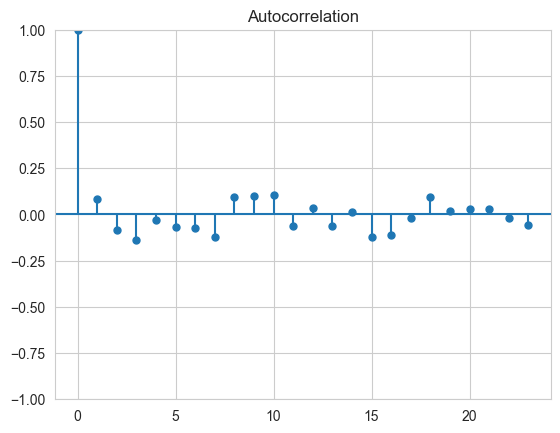

In [16]:
pm.plot_acf(data["exec_time"])